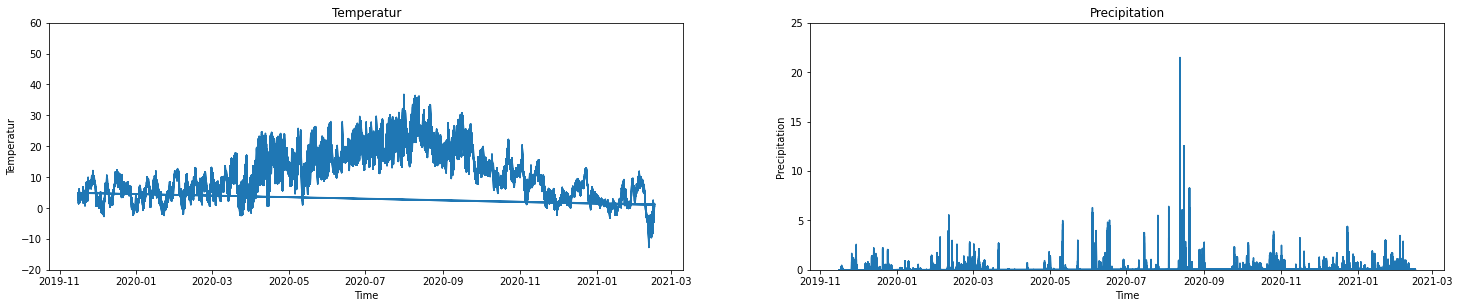

In [60]:
# Imports
import csv

import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# CSV file
file = '210226_Daten_Hackathon/210226_Daten_Wetter_Hackathon.csv'

# Weather data at a postcode
class WeatherData:
    # Weather data
    time = []
    temperature = []
    wind_speed = []
    precipitation = []
    radiation = []

    def __init__(self, postcode):
        self.postcode = postcode

    # Adds weather data to the postcode
    def add_data(self, time, temperature, wind_speed, precipitation, radiation):
        self.time.append(time)
        self.temperature.append(temperature)
        self.wind_speed.append(wind_speed)
        self.precipitation.append(precipitation)
        self.radiation.append(radiation)


# Weather for each postcode
weather = {}

# Open the CSV file
with open(file) as csv_file:
    # Read the CSV file with delimiter ';'
    csv_reader = csv.reader(csv_file, delimiter = ";")
    i = 0

    # Iterate through CSV rows
    for row in csv_reader:
        # Skip first 2 lines
        if i < 2:
            i = i + 1
            continue

        # Get parameters
        time = datetime.datetime.strptime(row[0], '%d.%m.%Y %H:%M')
        postcode = int(row[1])
        temperature = float(row[2].replace(",", "."))
        #wind_speed = float(row[3].replace(",", "."))
        wind_speed = 0
        precipitation = float(row[4].replace(",", "."))
        radiation = float(row[5].replace(",", "."))

        # Get current weather instance
        if (postcode in weather) == False:
            weather[postcode] = WeatherData(postcode)

        current = weather[postcode]

        # Add wheather data
        current.add_data(time, temperature, wind_speed, precipitation, radiation)

# Plot temperature
fig = plt.figure(figsize =(25, 10))
sub1 = fig.add_subplot(221)
sub1.set_title('Temperatur')
sub1.set_xlabel('Time')
sub1.set_ylabel('Temperatur')
sub1.set_ylim(-20, 60)
sub1.plot(weather[76137].time, weather[76137].temperature)

# Plot precipitation
sub2 = fig.add_subplot(222)
sub2.set_title('Precipitation')
sub2.set_xlabel('Time')
sub2.set_ylabel('Precipitation')
sub2.set_ylim(0, 25)
sub2.plot(weather[76137].time, weather[76137].precipitation)

plt.show()